# BLIŽINA, EKSCENTRIČNOST IN VMESNA CENTRALNOST

Pri najinem projektu bova s pomočjo treh različnih mer (ekscentričnosti, bližine in vmesne centralnosti) iskala in analizirala najpomembnejša vozlišča v grafih oziroma socialnih omrežjih. Vozlišče je pomembnejše, če ima višjo vrednost bližine in vmesne centralnosti ter nižjo vrednost ekscentričnosti. Natančnejši opisi pojmov so spodaj. Primerjala bova, kako pogosto je vozlišče, ki je pomembno z vidika ene mere, pomembno tudi v okviru ostalih dveh mer.

Najino glavno orodje za analizo grafov bo $Sage$, kjer bova generirala več grafov (približno 1000) v različnih velikostih (približno 10), grafe socialnih omrežij pa bova pridobila s spleta. Opazovala bova tudi, kako se vrednosti mer za najpomembnejša vozlišča spremenijo, če se omejimo na podgraf v določenem grafu. Grafi, ki jih bova pri projektu analizirala, bodo neusmerjeni.

## Bližina
Bližina je v povezanem grafu mera centralnosti, ki jo izračunamo kot
recipročno vsoto dolžin najkrajših poti med nekim vozliščem in vsemi
drugimi vozlišči v grafu. Bližje kot je opazovano vozlišče ostalim
vozliščem v grafu, bolj centralno je.

\begin{equation*}
C(x) = \frac{1}{\sum_{y}d(y,x)},
\end{equation*}

kjer je *d*(*y*, *x*) razdalja med vozliščema x in y. Pogosto se namesto
zgornje vrednosti izračuna povprečno dolžino najkrajše poti v grafu.
Dobimo jo tako, da zgornjo formulo pomnožimo z *N* − 1, kjer je *N*
število vseh vozlišč v grafu. Pri obsežnejših grafih se  − 1 izpusti iz
enačbe, zato se za bližino uporablja kar sledečo formulo:

\begin{equation*}
C(x) = \frac{N}{\sum_{y}d(y,x)}.
\end{equation*}

Pri usmerjenih grafih je potrebno upoštevati tudi smer povezav. Določeno
vozlišče ima lahko različno bližino za vhodne in izhodne povezave. V
nepovezanih grafih namesto recipročne vsote dolžin najkrajših poti med
vozlišči računamo vsoto recipročnih dolžin najkrajših poti med vozlišči.
Pri tem upoštevamo, da $1/\infty = 0$

\begin{equation*}
H(x) = \frac{N}{\sum_{y \neq x}d(y,x)}.
\end{equation*}

## Ekscentričnost (izsrednost)
Ekscentričnost nekega vozlišča $v$  v povezanem grafu $G$ označimo z $\epsilon(v)$ in je definirana kot maksimalna dolžina med vozliščem $v$ in katerimkoli drugim vozliščem v grafu $G$. V nepovezanih grafih imajo vsa vozlišča neskončno vrednost ekscentičnosti.
Maksimalno ekscentričnost v grafu imenujemo diameter (premer) grafa (najdaljša najkrajša pot med dvema vozliščema grafa), minimalno ekscentričnost pa polmer grafa.

## Vmesna centralnost

V teoriji grafov je vmesna centralnost mera centralizacije grafa, ki temelji na najkrajših poteh v grafu. Za vsak par vozlišč v povezanem grafu, obstaja vsaj ena najkrajša pot med vozliščema tako, da je katerokoli število povezav, po katerih gre ta pot (za neutežene grafe) ali pa vsota uteži na povezavah (za utežene grafe) minimalna. Vmesna centralnost za vsako vozlišče je število teh najkrajših poti, ki grejo skozi vozlišče. Vmesna centralnost se uporablja v mnogih problemih v teoriji omrežij, tudi v problemih povezanih s socialnimi omrežji, biologijo in transportom. V telekomunikacijskem omrežju ima vozlišče z višjo vrednostjo vmesne centralnosti večjo kontrolo nad omrežjem, ker bo več informacij teklo čez to vozlišče. Vmesna centralnost vozlišča $v$ je podana z izrazom:

\begin{equation*}
g(v) = \sum_{s \ne v \ne t}^{ } \frac{\sigma_{st} (v)}{\sigma_{st}}
\end{equation*}

Kjer je $\sigma_{st}$ skupno število najkrajših poti od vozlišča $s$ do vozlišča $t$ in $\sigma_{st} (v)$ je število teh poti, ki grejo skozi $v$. 

## Implementacija algoritma
Najprej se bova osredotočila na implementacijo algoritma. Kot prvo sva definirala bližino, ekscentričnost in vmesno centralnost, nato pa sva za sam algoritem potrebovala še dve funkciji, in sicer *najboljsa_vozlisca* in *skupna*. Prva nam pomaga iz seznama vozlišč in mer, ki jih dobimo na začetku v funkcijah *blizina*, *ekscentricnost* in *vmesna_centralnost*, izločiti tista vozlišča, ki nam predstavljajo najboljših 10% vozlišč. Pri bližini in vmesni centralnosti so to vozlišča, ki imajo najvišjo vrednost, pri ekscentričnosti pa vozlišča z najmanjšo vrednostjo. V drugi funkciji pa preverimo, katera vozlišča so skupna v vseh treh seznamih najboljših vozlišč. Na ta način dobimo množico tistih vozlišč, ki se pojavijo v vseh treh merah kot najboljša. V funkciji *algoritem*, ki je odvisna od podane velikosti za graf, pa nato za 100 grafov iste velikosti poračunamo kolikšen procent vozlišč se ujema pri vseh treh merah. Sproti računamo še povprečje tega procenta za vseh 100 grafov, kar bova v prvem delu tudi poskusila analizirati. 

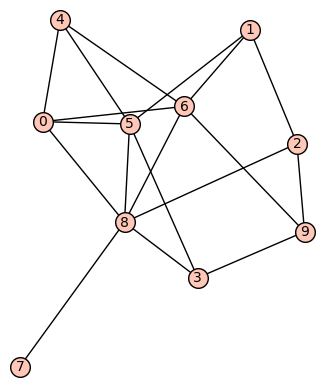

In [3]:
G = graphs.RandomGNP(10, 0.5)
show(G)

In [2]:
def blizina(G):
    seznam = []
    d = G.distance_all_pairs()
    for x in G:
        D = 1/sum(d[x].values())
        seznam.append((x,D))
    return seznam
blizina(G)

[(0, 1/18),
 (1, 1/12),
 (2, 1/19),
 (3, 1/16),
 (4, 1/13),
 (5, 1/15),
 (6, 1/14),
 (7, 1/16),
 (8, 1/11),
 (9, 1/12)]

In [4]:
def ekscentricnost(G):
    seznam = []
    for x in G:
        E = G.eccentricity(x)
        seznam.append((x,E))
    return seznam
ekscentricnost(G)

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 2),
 (4, 3),
 (5, 2),
 (6, 2),
 (7, 3),
 (8, 2),
 (9, 3)]

In [5]:
import networkx as nx 

def vmesna_centralnost(G):
    for x in G:
        nxG = G.networkx_graph()
        Vslovar = nx.betweenness_centrality(nxG) #to nam vrne slovar, kjer je vozlišče ključ in vmesna centralnost vozlišča vrednost
        V = Vslovar.items() #slovar moramo pretvoriti v seznam, da bo prave oblike za algoritem
        return V
vmesna_centralnost(G)

[(0, 0.030092592592592587),
 (1, 0.039351851851851846),
 (2, 0.050925925925925916),
 (3, 0.04629629629629629),
 (4, 0.006944444444444444),
 (5, 0.1435185185185185),
 (6, 0.16666666666666663),
 (7, 0.0),
 (8, 0.3356481481481481),
 (9, 0.041666666666666664)]

In [6]:
import math

def najboljsa_vozlisca(G, velikost, B, E, V):

    najboljsi = round(velikost * 0.1) #zračunamo, koliko najboljših vozlišč bomo vzeli ven, če želimo 10% najboljših
    B.sort(key=lambda x: -x[1]) #seznam uredimo po velikosti glede na vrednosti mere
    maxB = B[:najboljsi] # iz seznama vzamemo najoljše elemente
    minimalni = min(maxB, key=lambda x: x[1])[1] #Preveriti moramo še, če je slučajno v B ostal kakšen element, ki ima enako vrednost, kot jo ima najmanjši element v maxB, saj mora biti potem to vozlišče tudi v maxB
    for element in B:
        if element[1] == minimalni:
            maxB.append((element[0], element[1]))

    E.sort(key=lambda x: x[1])
    minE = E[:najboljsi]
    maksimalni = max(minE, key=lambda x: x[1])[1] #Preveriti moramo še, če je slučajno v E ostal kakšen element, ki ima enako vrednost, kot jo ima največji element v minE, saj mora biti potem to vozlišče tudi v minE
    for element in E:
        if element[1] == maksimalni:
            minE.append((element[0], element[1]))


    V.sort(key=lambda x: -x[1])
    maxV = V[:najboljsi]
    minimalni = min(maxV, key=lambda x: x[1])[1] #Preveriti moramo še, če je slučajno v V ostal kakšen element, ki ima enako vrednost, kot jo ima najmanjši element v maxV, saj mora biti potem to vozlišče tudi v maxV
    for element in V:
        if element[1] == minimalni:
            maxV.append((element[0], element[1]))

    return(maxB, minE, maxV)

In [7]:
def skupna(maxB, minE, maxV):
    imenaB = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika bližine v nov seznam
    for element in maxB:
        imenaB+= [element[0]]
        
    imenaE = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika ekscentričnosti v nov seznam
    for element in minE:
        imenaE+= [element[0]]

    imenaV = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika vmesne centralnosti v nov seznam
    for element in maxV:
        imenaV+= [element[0]]

    skupna_vozl = set(imenaB).intersection(imenaE).intersection(imenaV) #naredimo presek vsek treh seznamov.
    return(skupna_vozl)

In [8]:
from __future__ import division

def algoritem(velikost, p=0.7, izpis=False):
    vsota = 0
    j = 0
    povprecje = 0
    for i in range(100):
        G = graphs.RandomGNP(velikost, p) #generiramo graf
        if G.is_connected() == True: #preverimo, če je povezan
            B = blizina(G) #dobimo seznam vozlišč in njihove bližine
            E = ekscentricnost(G) #dobimo seznam vozlišč in njihove ekscentričnosti
            V = vmesna_centralnost(G) #dobimo seznam vozlišč in njihove vmesne centralnosti
            
            maxB, minE, maxV = najboljsa_vozlisca(G, velikost, B, E, V) #naredimo sezname najboljših vozlišč za vsako mero posebej
            skupna_vozlisca = skupna(maxB, minE, maxV) #preverimo, koliko vozlišč je vsem trem meram skupno
            stevilo_skupnih_vozlisc = len(skupna_vozlisca) #preštejemo števila skupnih vozlišč
            pokritost = float(stevilo_skupnih_vozlisc / max(len(maxB), len(minE), len(maxV))) #zračunamo procent, koliko vozlišč je skupnih vsem trem meram
            vsota += pokritost
            j += 1
            povprecje = vsota / j #sproti računamo povprečno pokritost za vse grafe
            if izpis:
                print(povprecje)
        
    return(povprecje)
            
        
        
   
algoritem(10)

0

In [2]:
velikosti = (20, 40, 75, 100, 200, 400, 800, 1000, 2000) #izberemo si velikosti grafov, na katerih bomo delali analizo. Zadnja številka je enaka številu vozlišč v socialnem omrežju s katerim bova primerjala rezultate
seznam_velikosti = list(velikosti)

In [9]:
from json import dump

povprecja = []
for i in velikosti:
    povprecja.append(algoritem(i)) #za vsako velikost poženemo algoritem, da dobimo povprečno pokritost
    print(povprecja[-1])
    with open("povprecja.json", "w") as f:
        dump(povprecja, f)

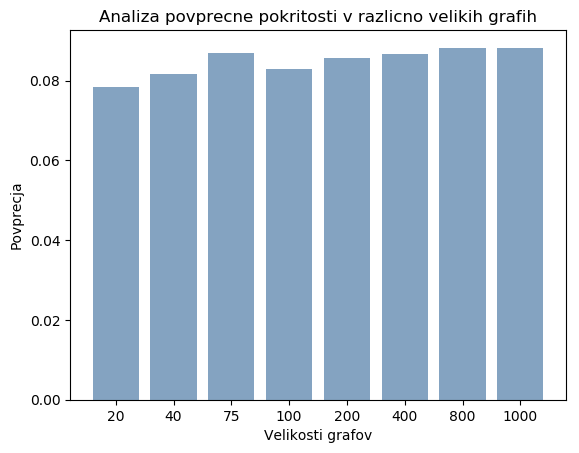

In [3]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
from json import load

with open("povprecja.json") as f:
    povprecja = load(f)
y_pos = np.arange(len(povprecja))
plt.bar(y_pos,povprecja,align = 'center',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos,velikosti)
plt.xlabel('Velikosti grafov')
plt.ylabel('Povprecja')
plt.title('Analiza povprecne pokritosti v razlicno velikih grafih')
plt.show()

Torej analizirali smo grafe velikosti 20, 40, 75, 100, 200, 400, 800 in 1000. Iz zgornjega grafa je lepo razvidno, da povprečje vozlišč, ki so najboljša iz zornega kota najinih treh mer, precej strmo pada s tem, ko višamo število vozlišč v grafu. Če najprej pogledamo grafe na 20 vozliščih vidimo, da je tu prisotnih največ vozlišč v povprečju, ki se med seboj ujemajo, čeprav če pogledamona skalo grafa, je še vseeno ta številka precej majhna - torej gre za približno 5% pokrivanje vozlišč. Že pri grafih na 40 vozliščih pa se ta številka že precej zniža in pridemo na malce več kot 2% vozlišč. To zniževanje opazujemo naprej in pri grafu na 1000 vozliščih vidimo, da je ujemanje vozlišč že skoraj pri 0. 

## Socialno omrežje

In [9]:
import networkx as nx
import math

G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int) #Iz datoteke smo socialno omrežje zapisali v obliki grafa
#Graf ima 4039 vozlišč in 88234 povezav
G_fb_sage = Graph(G_fb) #Zgornji graf smo pretvorili v Sage-ov graf
G_tretji = nx.read_edgelist("testni5.txt", create_using = nx.Graph(), nodetype=int) #Iz datoteke smo socialno omrežje zapisali v obliki grafa
G_sage_tretji = Graph(G_tretji) #Zgornji graf smo pretvorili v Sage-ov graf


def algoritem_soc(socialno_omrezje):
    B = blizina(socialno_omrezje) #dobimo seznam vozlišč in njihove bližine
    E = ekscentricnost(socialno_omrezje) #dobimo seznam vozlišč in njihove ekscentričnosti
    V = vmesna_centralnost(socialno_omrezje) #dobimo seznam vozlišč in njihove vmesne centralnosti
    povprecje = 0
    velikost = 4039 
    maxB, minE, maxV = najboljsa_vozlisca(socialno_omrezje, velikost, B, E, V) #naredimo sezname najboljših vozlišč za vsako mero posebej
    skupna_vozlisca_soc = skupna(maxB, minE, maxV) #preverimo, koliko vozlišč je vsem trem meram skupno
    stevilo_skupnih_vozlisc_soc = len(skupna_vozlisca_soc) #preštejemo števila skupnih vozlišč
    povprecje = float(stevilo_skupnih_vozlisc_soc / max(len(maxB), len(minE), len(maxV))) #zračunamo procent, koliko vozlišč je skupnih vsem trem meram
    #povprecje = (povprecje + pokritost) / 2 #sproti računamo povprečno pokritost za vse grafe
        
    return(povprecje)

algoritem_soc(G_sage_tretji)

0.5625

In [10]:
from json import dump

povprecja = [] #sedaj bomo primerjali socialno omrežje in generirane grafe, zato bomo najprej dodati povprečje za socialno omrežje, nato pa še za generirane grafe
povprecja.append(algoritem_soc(G_fb_sage))
povprecja
#with open("povprecja_soc.json", "w") as f:
    #dump(povprecja, f)
povprecja.append(algoritem(4039, p=0.0108, izpis=True))
povprecja
#with open("povprecja_soc.json", "w") as f:
 #   dump(povprecja, f)
    

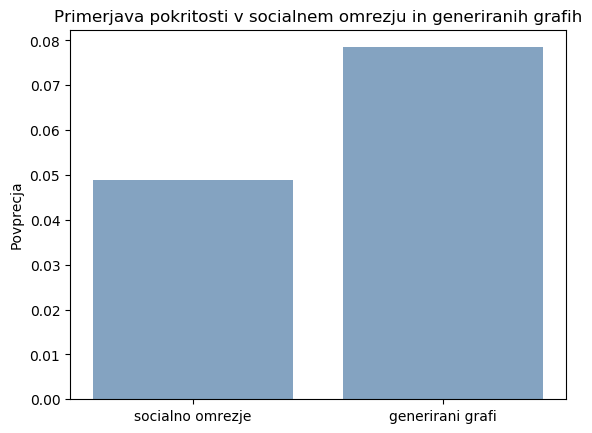

In [1]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
from json import load

with open("povprecja_soc.json") as f:
    povprecja = load(f)

grafi = ("socialno omrezje", "generirani grafi")
y_pos = np.arange(len(povprecja))
plt.bar(y_pos,povprecja,align = 'center',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos,grafi)
plt.ylabel('Povprecja')
plt.title('Primerjava pokritosti v socialnem omrezju in generiranih grafih')
plt.show()

## Podgrafi

In [25]:
from __future__ import division

def shrani_podgrafe(G):
    seznam = []
    #generiramo štiri random podgrafe in jih damo v seznam
    for i in range(4):
        seznam.append(G.random_subgraph(0.95 - i*0.05))
    return seznam

def izracunaj_mere_za_podgrafe(G_sub,mera):
    seznam = []
    #izračunamo mere za vse štiri podgrafe in jih damo v seznam
    if mera == "blizina":
        for i in range(4):
            seznam.append(blizina(G_sub[i]))
    elif mera == "ekscentricnost":
        for i in range(4):
            seznam.append(ekscentricnost(G_sub[i]))
    elif mera == "vmesna_centralnost":
        for i in range(4):
            seznam.append(vmesna_centralnost(G_sub[i]))
    return seznam

def izracunaj_povprecje(skupna_vozlisca,skupna_prvotni):
    if len(skupna_vozlisca) > 0 :#ker je bil problem, če ni bilo skupnih vozlišč ... deljenje z 0
        return  len(skupna_prvotni)/len(skupna_vozlisca) #procent ujemanja
    else:
        return 0

def algoritem_sub(velikost, izpisi=False):
    k = 100 #da ne spreminjamo števillka v prvi for zanki in pri returnu za vsak od štirih rezultatov
    vsota_prvotni_sub = [0, 0, 0, 0]
    j = 0
   
    for i in range(k):
        G = graphs.RandomGNP(velikost, 0.7) #generiramo graf
        if G.is_connected() == True: #preverimo, če je povezan
            B = blizina(G) #dobimo seznam vozlišč in njihove bližine
            E = ekscentricnost(G) #dobimo seznam vozlišč in njihove ekscentričnosti
            V = vmesna_centralnost(G) #dobimo seznam vozlišč in njihove vmesne centralnosti
            #Za vsak graf naredimo 4 podgrafe štirih različnih velikosti
            G_sub = shrani_podgrafe(G)
            B_sub = izracunaj_mere_za_podgrafe(G_sub,"blizina")
            E_sub = izracunaj_mere_za_podgrafe(G_sub,"ekscentricnost")
            V_sub = izracunaj_mere_za_podgrafe(G_sub,"vmesna_centralnost")
           
            
            maxB, minE, maxV = najboljsa_vozlisca(G, velikost, B, E, V) #naredimo sezname najboljših vozlišč za vsako mero posebej
            max_B_minE_maxV_sub = []
            for i in range(4):
                max_B_minE_maxV_sub.append(najboljsa_vozlisca(G_sub[i],velikost*(0.95 - i*0.15),B_sub[i], E_sub[i], V_sub[i]))
            
            skupna_vozlisca = skupna(maxB, minE, maxV) #preverimo, koliko vozlišč je vsem trem meram skupno
            skupna_vozlisca_sub = []
            for i in range(4):
                skupna_vozlisca_sub.append(skupna(max_B_minE_maxV_sub[i][0],max_B_minE_maxV_sub[i][1],max_B_minE_maxV_sub[i][2]))

            
            #Primerjava podgrafov in originalnega grafa - presek podgrafa in originalnega grafa
            skupni_prvotni_sub = []
            for i in range(4):
                skupni_prvotni_sub.append(set(skupna_vozlisca).intersection(skupna_vozlisca_sub[i]))
            
            j += 1
            for i in range(4):
                vsota_prvotni_sub[i] += izracunaj_povprecje(skupna_vozlisca_sub[i],skupni_prvotni_sub[i])
            povprecje_prvotni_sub = [v/j for v in vsota_prvotni_sub]
                
            
        
    return(povprecje_prvotni_sub)
            
        

algoritem_sub(50)

[0.7894603360709879,
 0.9652348473984531,
 0.9833402902041894,
 0.7884019052891574]

In [0]:
from json import dump
povprecja = algoritem_sub(400, izpisi=True)
with open("povprecja_sub.json", "w") as f:
    dump(povprecja, f)

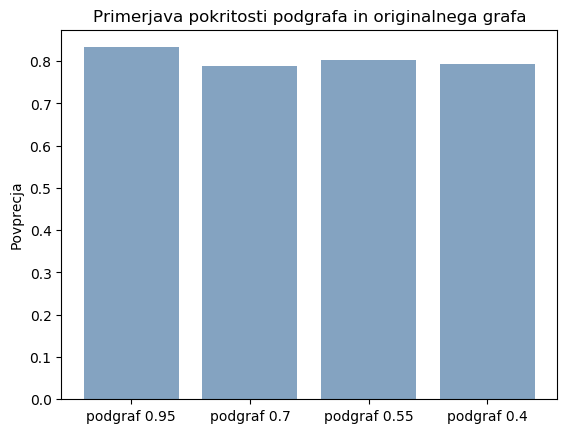

In [1]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
from json import load

with open("povprecja_sub.json") as f:
    povprecja = load(f)

grafi = ("podgraf 0.95", "podgraf 0.7", "podgraf 0.55", "podgraf 0.4")
y_pos = np.arange(len(povprecja))
plt.bar(y_pos,povprecja,align = 'center',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos,grafi)
plt.ylabel('Povprecja')
plt.title('Primerjava pokritosti podgrafa in originalnega grafa')
plt.show()